Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 019
Code Title: | Emerging Technologies in CpE 2
2nd Semester | AY 2023-2024
<hr> | <hr>
**Activity**:|Assignment 10.2 - ARIMA Model**
<hr> | <hr>
**Name**         | Naga, Jamal
**Section** | CPE32S3
**Date Performed**: |May 01, 2024
**Date Submitted**: |May 04, 2024
**Instructor**: | Engr. Roman Richard
<hr> | <hr>


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Task 1: Load time series data: data.csv

In [ ]:
#Importing some libraries
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import matplotlib.ticker as ticker
from pandas.plotting import autocorrelation_plot
from pandas import read_csv
from statsmodels.tsa.arima.model import ARIMA
from pandas import DataFrame
from math import sqrt
from sklearn.metrics import mean_squared_error
from datetime import datetime

In [ ]:
def parser(x):
    return datetime.strptime(x, '%Y-%m')

series = pd.read_csv('/content/drive/MyDrive/hoa 10.2/data.csv', header=0, parse_dates=[0], index_col=0, date_parser=parser)
print(series.head())

            CO2 (ppm)
Month                
1965-01-01     319.32
1965-02-01     320.36
1965-03-01     320.82
1965-04-01     322.06
1965-05-01     322.17


<ipython-input-2-fa158e7d50fb>:11: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  series = pd.read_csv('/content/drive/MyDrive/hoa 10.2/data.csv', header=0, parse_dates=[0], index_col=0, date_parser=parser)


# Task 2: Vissualize the time series


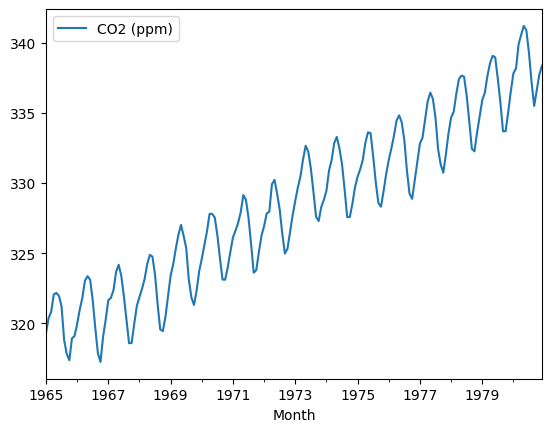

In [ ]:
series.plot()
plt.show()

**Observation:** Based on the figure, it appears that the time series data exhibits non-stationary behavior, and to address this, it would be advisable to apply first-order differencing to the data in order to transform it into a stationary form, which would then enable the effective application of appropriate modeling techniques to analyze the underlying patterns within the data.


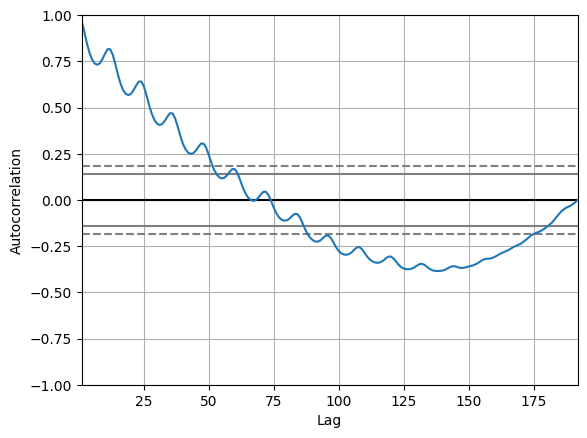

In [ ]:
autocorrelation_plot(series)
plt.show()

**Evaluation:** The plot shows a significant positive correlation at lag 1, indicating a strong relationship between consecutive observations. As the lag increases, the autocorrelation gradually decreases and becomes insignificant, suggesting that the correlation between observations diminishes as they become more distant from each other in time.

# Task 3: Fit an ARIMA Model (baseline model order = (1,1,1))

In [ ]:
# fit model
model = ARIMA(series, order=(1,1,1))
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


**OUTPUT**

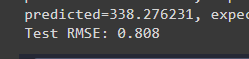

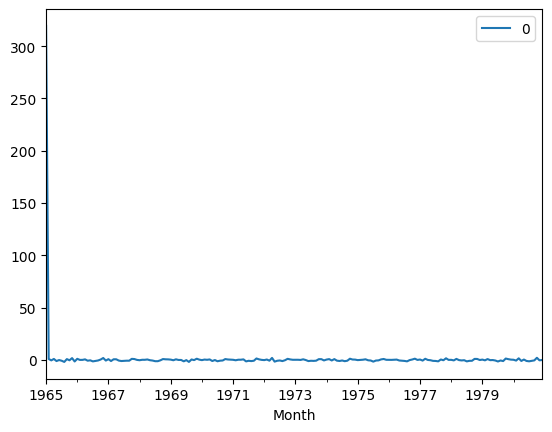

In [ ]:
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.show()


**Observation:** Get a line plot of the residual errors, to know if there may be some trend information not captured by the model.

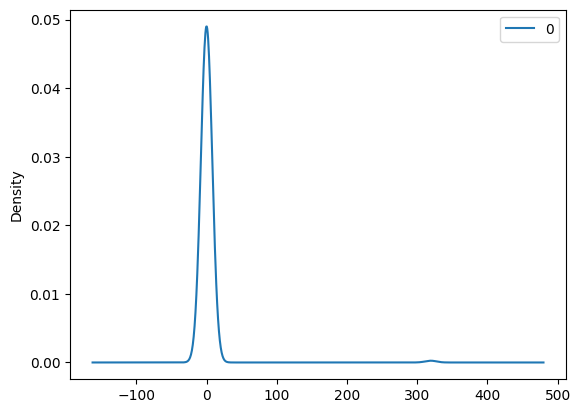

In [ ]:
# density plot of residuals
residuals.plot(kind='kde')
plt.show()

**Observation:** Looking at the plot getting the residual errors shows that the model is working good but it can be improved more.

# Task 4: Improve ARIMA Model

In [ ]:
# from (1,1,1) I changed it into (7,1,0)
model = ARIMA(series, order=(7,1,0))
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


**OUTPUT**

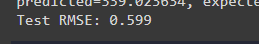

**Observation:** After changing the model from (1,1,1) to (7,1,0) it improved from 0.808 to 0.599 RMSE, it indicate that changing the model's order can improved the model significantly.

# Task 5: Print the model summary

In [ ]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:              CO2 (ppm)   No. Observations:                  192
Model:                 ARIMA(7, 1, 0)   Log Likelihood                -166.404
Date:                Wed, 01 May 2024   AIC                            348.808
Time:                        07:07:14   BIC                            374.827
Sample:                    01-01-1965   HQIC                           359.347
                         - 12-01-1980                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6115      0.070      8.752      0.000       0.475       0.748
ar.L2         -0.0457      0.088     -0.521      0.602      -0.217       0.126
ar.L3         -0.4372      0.079     -5.506      0.0

**Observation:** The ARIMA(7, 1, 0) model parameters exhibit significant autoregressive effects up to lag 7, with some coefficients statistically insignificant, yet the model adequately captures autocorrelation in the data, supported by descriptive statistics reflecting a wide range of values with a mean close to zero and considerable variability.

# Task 6: Make a forecast (steps=10)

In [ ]:
# split into train and test sets
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(7,1,0))
	model_fit = model.fit()
	output = model_fit.forecast(steps = 10)
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

<ipython-input-3-3f405593c5c6>:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('predicted=%f, expected=%f' % (yhat, obs))


predicted=332.360624, expected=331.900000
predicted=330.068307, expected=330.050000
predicted=328.793083, expected=328.580000
predicted=328.236059, expected=328.310000
predicted=328.724187, expected=329.410000
predicted=330.526405, expected=330.630000
predicted=331.523492, expected=331.630000
predicted=332.398181, expected=332.460000
predicted=333.007900, expected=333.360000
predicted=334.027369, expected=334.450000
predicted=334.801426, expected=334.820000
predicted=334.030038, expected=334.320000
predicted=332.876966, expected=333.050000
predicted=331.540795, expected=330.870000
predicted=329.472275, expected=329.240000
predicted=328.605067, expected=328.870000
predicted=329.285869, expected=330.180000
predicted=331.818385, expected=331.500000
predicted=332.711502, expected=332.810000
predicted=333.476830, expected=333.230000
predicted=333.576330, expected=334.550000
predicted=335.460946, expected=335.820000
predicted=336.432568, expected=336.440000
predicted=335.635902, expected=335

Observation: Expanding the forecast to 10 steps ahead extends the prediction scope, potentially introducing greater uncertainty as predictions. Despite this, the ARIMA(7, 1, 0) model successfully predicts the time series values with a low RMSE of 0.599, indicating good accuracy in forecasting, supported by the close alignment between predicted and expected values throughout the test period, suggesting the model's effectiveness in capturing the underlying patterns in the data.

# Task 7: Plot the forecast

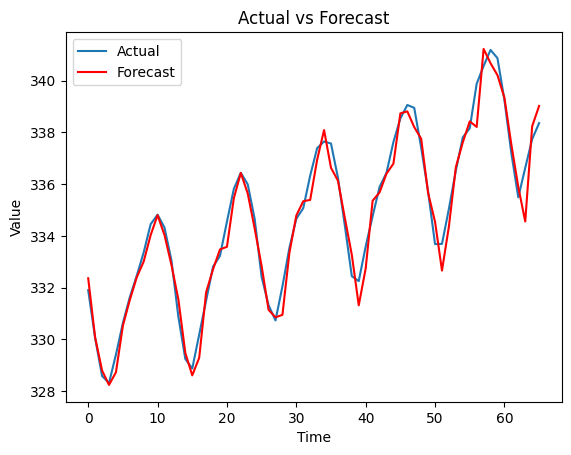

In [ ]:
# Plotting the actual values
plt.plot(test, label='Actual')

# Plotting the forecasted values
forecast_range = range(len(test))
plt.plot(forecast_range, predictions, color='red', linestyle='-', label='Forecast')

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Actual vs Forecast')
plt.legend()
plt.show()


Evaluation: The plot shows that the forecast closely follows the actual values, indicating the model's ability to capture the underlying patterns in the data. However, there are slight deviations between the forecast and actual values, especially towards the end of the time series, suggesting some degree of uncertainty in longer-term predictions.

# Task 8: Perform a grid search

In [ ]:
def evaluate_arima_model(X, arima_order):
  X = series.values
  size = int(len(X) * 0.66)
  train, test = X[0:size], X[size:len(X)]
  history = [x for x in train]
  predictions = list()
  for t in range(len(test)):
    improved_model = ARIMA(history, order=arima_order)
    improved_model_fit = improved_model.fit()
    output = improved_model_fit.forecast(steps=10)
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
  error = sqrt(mean_squared_error(test, predictions))
  return error

In [ ]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    error = evaluate_arima_model(dataset, order)
                    if error < best_score:
                        best_score, best_cfg = error, order
                    print('ARIMA%s MSE=%.3f' % (order,error))
                except:
                    continue
    print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))

In [ ]:
# evaluate parameters
p_values = [0, 1, 3, 5, 7, 9, 11]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=8.375
ARIMA(0, 0, 1) MSE=4.310
ARIMA(0, 0, 2) MSE=2.611
ARIMA(0, 1, 0) MSE=1.220
ARIMA(0, 1, 1) MSE=0.901
ARIMA(0, 1, 2) MSE=0.757
ARIMA(0, 2, 0) MSE=0.935
ARIMA(0, 2, 1) MSE=0.901
ARIMA(0, 2, 2) MSE=0.878
ARIMA(1, 0, 0) MSE=1.236
ARIMA(1, 0, 1) MSE=0.913
ARIMA(1, 0, 2) MSE=0.771
ARIMA(1, 1, 0) MSE=0.867
ARIMA(1, 1, 1) MSE=0.808
ARIMA(1, 1, 2) MSE=0.742
ARIMA(1, 2, 0) MSE=0.898
ARIMA(1, 2, 1) MSE=0.898
ARIMA(1, 2, 2) MSE=0.810
ARIMA(3, 0, 0) MSE=0.766
ARIMA(3, 0, 1) MSE=0.667
ARIMA(3, 0, 2) MSE=0.671
ARIMA(3, 1, 0) MSE=0.702
ARIMA(3, 1, 1) MSE=0.665
ARIMA(3, 1, 2) MSE=0.663
ARIMA(3, 2, 0) MSE=0.815
ARIMA(3, 2, 1) MSE=0.703
ARIMA(3, 2, 2) MSE=0.616
ARIMA(5, 0, 0) MSE=0.718
ARIMA(5, 0, 1) MSE=0.720
ARIMA(5, 0, 2) MSE=0.668
ARIMA(5, 1, 0) MSE=0.697
ARIMA(5, 1, 1) MSE=57.593
ARIMA(5, 1, 2) MSE=0.710
ARIMA(5, 2, 0) MSE=0.816
ARIMA(5, 2, 1) MSE=0.801
ARIMA(5, 2, 2) MSE=0.708
ARIMA(7, 0, 0) MSE=0.618
ARIMA(7, 0, 2) MSE=0.612
ARIMA(7, 1, 0) MSE=0.599
ARIMA(7, 1, 1) MSE=0.563

**Evaluation:** Here I perform the grid search and I put p_values = [0, 1, 3, 5, 7, 9, 11], d_values = range(0, 3), and q_values = range(0, 3) where the output shows that the best ARIMA is in order (11,2,1) which MSE of 0.331.

# **Supplementary Activity:  do the same for this dataset - dataset_temperature.csv**

## Load the dataset_temperature.csv

In [ ]:
#Importing some libraries
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import matplotlib.ticker as ticker
from pandas.plotting import autocorrelation_plot
from pandas import read_csv
from statsmodels.tsa.arima.model import ARIMA
from pandas import DataFrame
from math import sqrt
from sklearn.metrics import mean_squared_error
from datetime import datetime

In [ ]:
data_temp = pd.read_csv('/content/drive/MyDrive/hoa 10.2/dataset_temperature.csv')

In [ ]:
data_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 794 entries, 0 to 793
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Month                     793 non-null    object
 1   Mean monthly temperature  793 non-null    object
dtypes: object(2)
memory usage: 12.5+ KB


In [ ]:
data_temp.head()

,Month,Mean monthly temperature
0,1907-01,33.3
1,1907-02,46
2,1907-03,43
3,1907-04,55
4,1907-05,51.8


In [ ]:
data_temp.tail()

,Month,Mean monthly temperature
789,1972-10,51.7
790,1972-11,40.3
791,1972-12,30.3
792,NaN,NaN
793,Mean monthly temperature,1907 ? 1972


In [ ]:
def parser(x):
    if isinstance(x, str):
        try:
            return datetime.strptime(x, '%Y-%m')
        except ValueError:
            return pd.NaT  # Return NaT for non-date strings
    else:
        return pd.NaT  # Return NaT for non-string values

data_temp = pd.read_csv('/content/drive/MyDrive/hoa 10.2/dataset_temperature.csv', header=None, parse_dates=[0], index_col=0, date_parser=parser)
data_temp = data_temp.squeeze()

# Convert the values in the Series to numeric type
data_temp = pd.to_numeric(data_temp, errors='coerce')

# Drop rows with NaT values (non-date entries)
data_temp = data_temp.dropna()

# Drop the last 2 rows
data_temp.drop(data_temp.tail(2).index, inplace=True)

data_temp.tail()


<ipython-input-3-def7a6bb23fc>:13: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data_temp = pd.read_csv('/content/drive/MyDrive/hoa 10.2/dataset_temperature.csv', header=None, parse_dates=[0], index_col=0, date_parser=parser)


0
1972-06-01    72.1
1972-07-01    79.0
1972-08-01    75.6
1972-09-01    64.1
1972-10-01    51.7
Name: 1, dtype: float64

**Observation:** The last two rows appear to contain non-essential information such as NaN values and a summary statistic unrelated to the individual data points, I was referring to the row containing "Mean monthly temperature 1907? 1972", which may distort analysis or visualization, hence dropping them ensures data integrity and accuracy.

# Visualize the Time Series

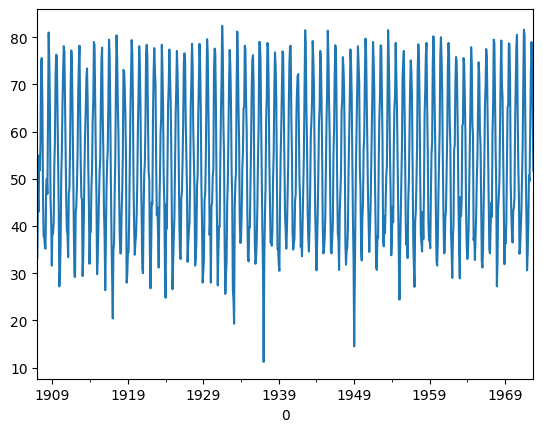

In [ ]:
data_temp.plot()
plt.show()

Observation: The plot of mean monthly temperature data from 1907 to 1972 shows fluctuations throughout the years with apparent seasonal patterns.

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

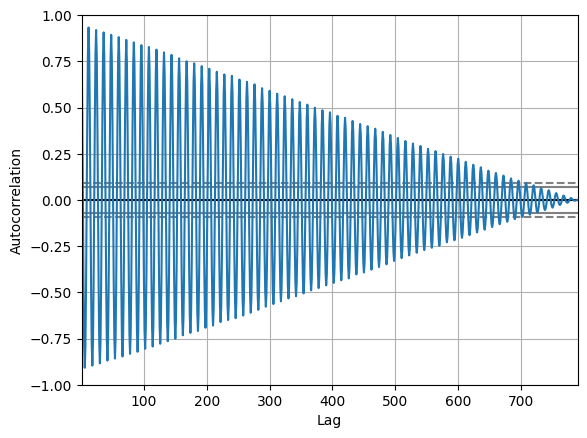

In [ ]:
# Visualizing its correlations
autocorrelation_plot(data_temp)

**Observation:** The plot shows that the data exhibits decreasing correlation as lag values approach zero, indicating potential limitations in capturing temporal dependencies effectively at shorter lags. However, significant positive correlation between temperatures at different time lags suggests a degree of seasonality in the data.

# Fit an ARIMA Model (baseline model order = (1,1,1))

In [ ]:
# fit model
model = ARIMA(data_temp, order=(1,1,1))
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


**OUTPUT:**

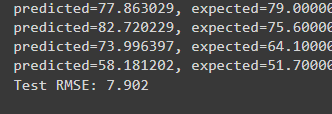

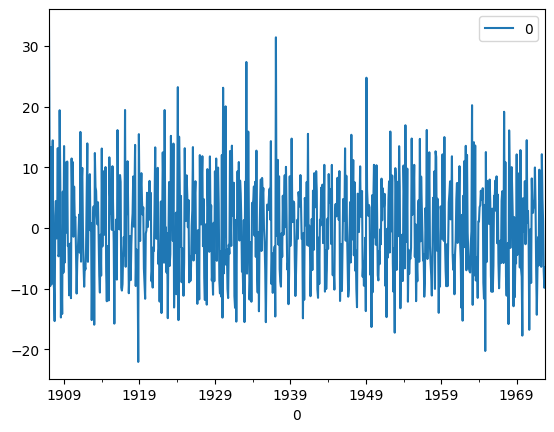

In [ ]:
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.show()

**Observation:** Seeing the residual plot suggest the baseline model isn't doing a great job. We might need to tweak some settings or try a different approach to make better model performance.

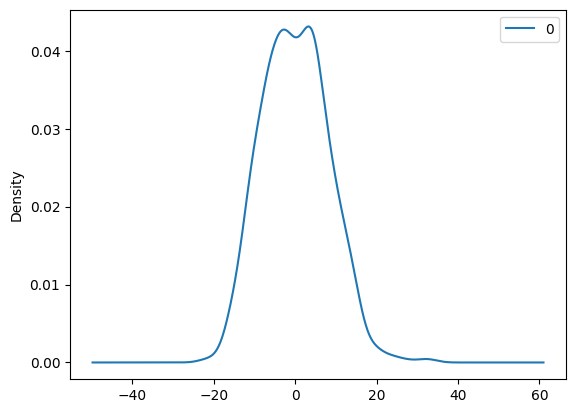

In [ ]:
# density plot of residuals
residuals.plot(kind='kde')
plt.show()

**Observation:** The density plot of the residual errors indicates that they follow a Gaussian (bell-shaped) distribution, but they might not be centered around zero. This suggests that the model's predictions tend to consistently overestimate or underestimate the actual values, indicating a bias in the model.

# Improve ARIMA Model

In [ ]:
# from (1,1,1) I changed it into (9,1,0)
model = ARIMA(data_temp, order=(9,1,0))
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


**OUTPUT:**

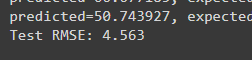

In [ ]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      1   No. Observations:                  790
Model:                 ARIMA(9, 1, 0)   Log Likelihood               -2377.383
Date:                Wed, 01 May 2024   AIC                           4774.765
Time:                        12:08:40   BIC                           4821.473
Sample:                    01-01-1907   HQIC                          4792.720
                         - 10-01-1972                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2661      0.032     -8.297      0.000      -0.329      -0.203
ar.L2         -0.2190      0.031     -6.972      0.000      -0.281      -0.157
ar.L3         -0.2647      0.028     -9.616      0.0

**Observation:**
The ARIMA(9, 1, 0) model exhibits a significant negative autocorrelation up to the ninth lag and suggests a substantial heteroskedasticity with a two-sided probability of 0.02.

# Make a forecast (steps=10)

In [ ]:
# split into train and test sets
X = data_temp.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(9,1,0))
	model_fit = model.fit()
	output = model_fit.forecast(steps = 10)
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

predicted=68.934821, expected=71.300000
predicted=75.053313, expected=79.700000
predicted=74.849548, expected=76.400000
predicted=69.445963, expected=66.200000
predicted=54.781576, expected=57.100000
predicted=46.171755, expected=46.300000
predicted=40.449139, expected=40.400000
predicted=37.526522, expected=34.500000
predicted=37.850577, expected=39.500000
predicted=43.408784, expected=43.200000
predicted=52.889936, expected=51.700000
predicted=63.690997, expected=60.700000
predicted=70.047270, expected=69.000000
predicted=72.383273, expected=79.000000
predicted=75.834965, expected=74.700000
predicted=67.909355, expected=68.600000
predicted=58.973470, expected=50.700000
predicted=42.470734, expected=41.300000
predicted=35.809476, expected=31.300000
predicted=30.156670, expected=30.700000
predicted=33.336711, expected=37.900000
predicted=43.545088, expected=37.500000
predicted=48.456441, expected=53.300000
predicted=64.797235, expected=62.700000
predicted=72.338611, expected=67.200000


**Observation:**
The ARIMA(9, 1, 0) model, with an order of (9, 1, 0) and a forecast steps of 10, accurately predicts future values with a relatively low root mean square error of 4.563, suggesting that incorporating nine autoregressive terms and differencing once improves forecasting performance.

# Plot the forecast

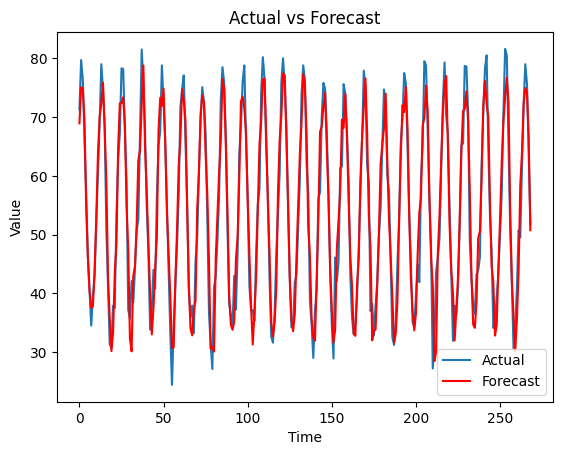

In [ ]:
# Plotting the actual values
plt.plot(test, label='Actual')

# Plotting the forecasted values
forecast_range = range(len(test))
plt.plot(forecast_range, predictions, color='red', linestyle='-', label='Forecast')

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Actual vs Forecast')
plt.legend()
plt.show()


**Observation:** The plot shows that the forecasted values closely track the actual values over time, with a Root Mean Square Error (RMSE) of 4.563, indicating a reasonably accurate prediction performance.

# Perform a grid search

In [ ]:
def evaluate_arima_model(X, arima_order):
  X = data_temp.values
  size = int(len(X) * 0.66)
  train, test = X[0:size], X[size:len(X)]
  history = [x for x in train]
  predictions = list()
  for t in range(len(test)):
    improved_model = ARIMA(history, order=arima_order)
    improved_model_fit = improved_model.fit()
    output = improved_model_fit.forecast(steps=10)
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
  error = sqrt(mean_squared_error(test, predictions))
  return error

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    error = evaluate_arima_model(dataset, order)
                    if error < best_score:
                        best_score, best_cfg = error, order
                    print('ARIMA%s MSE=%.3f' % (order,error))
                except:
                    continue
    print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))

# evaluate parameters
p_values = [0, 1, 3, 5, 7, 9, 11]
d_values = range(0, 2)
q_values = range(0, 2)
warnings.filterwarnings("ignore")
evaluate_models(data_temp.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=15.605
ARIMA(0, 0, 1) MSE=10.237
ARIMA(0, 1, 0) MSE=9.285
ARIMA(0, 1, 1) MSE=8.301
ARIMA(1, 0, 0) MSE=8.874
ARIMA(1, 0, 1) MSE=7.763
ARIMA(1, 1, 0) MSE=7.903
ARIMA(1, 1, 1) MSE=7.902
ARIMA(3, 0, 0) MSE=5.612
ARIMA(3, 0, 1) MSE=4.716
ARIMA(3, 1, 0) MSE=7.562
ARIMA(3, 1, 1) MSE=5.612
ARIMA(5, 0, 0) MSE=4.944
ARIMA(5, 0, 1) MSE=4.597
ARIMA(5, 1, 0) MSE=6.487
ARIMA(5, 1, 1) MSE=4.947
ARIMA(7, 0, 0) MSE=4.439
ARIMA(7, 0, 1) MSE=4.373
ARIMA(7, 1, 0) MSE=5.756
ARIMA(7, 1, 1) MSE=4.418
ARIMA(9, 0, 0) MSE=4.352
ARIMA(9, 0, 1) MSE=4.326
ARIMA(9, 1, 0) MSE=4.563
ARIMA(9, 1, 1) MSE=3.923
ARIMA(11, 0, 0) MSE=3.957
ARIMA(11, 0, 1) MSE=3.814
ARIMA(11, 1, 0) MSE=3.813
ARIMA(11, 1, 1) MSE=3.802
Best ARIMA(11, 1, 1) MSE=3.802


**Observation:** After executing the grid search it helps me to find the best ARIMA for my model where the best ARIMA model configuration for forecasting the time series data_temp has an order of (11, 1, 1) with a Mean Squared Error (MSE) of 3.802, indicating its superior performance compared to other configurations tested.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. 

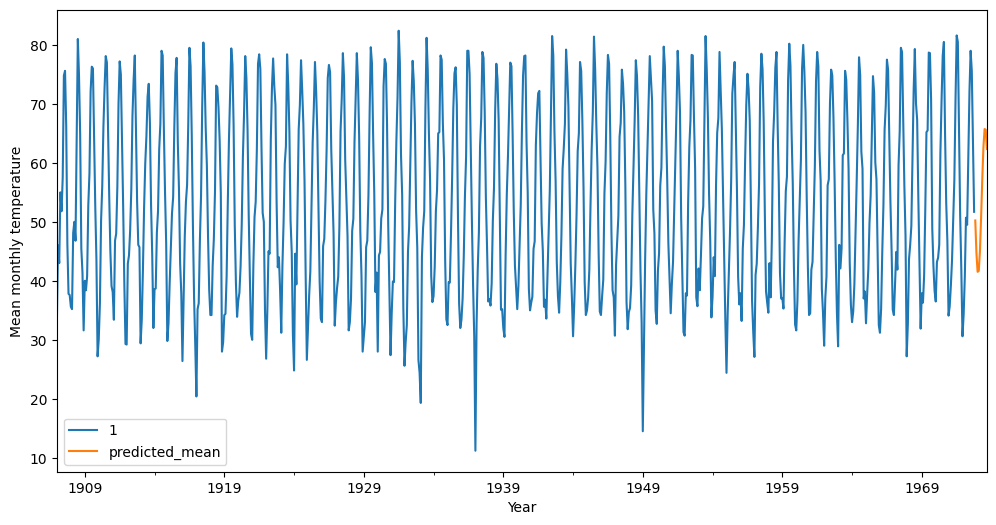

In [ ]:
formatter = ticker.StrMethodFormatter('{x:,.0f}')

# Splitting into train and test sets
train_size = int(len(data_temp) * 0.75)
train_data, test_data = data_temp[0:train_size], data_temp[train_size:]

start = len(train_data)
end=len(train_data)+len(test_data)-1
model = ARIMA(train_data, order = (11,1,1))
results = model.fit()
predictions = results.predict(start=start, end=end, dynamic=False, type='levels')
forecast = results.predict(len(data_temp), len(data_temp)+10, typ = 'levels')

ylabel='Mean monthly temperature'
xlabel='Year'

ax = data_temp.plot(legend=True,figsize=(12,6))
forecast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter);

**Evaluation:** The ARIMA (11,1,1) model provides a forecast with a Mean Squared Error (MSE) of 3.802, showing its capability to reasonably predict mean monthly temperatures, as demonstrated in the plot.

# Conclusion:


To conclude this activity, the task given in the procedure need to be apply in the supplementary where in the supplementary before I start I do preprocessing first, doing that I found out that the last two rows in the dataset has a nan values where it is non-essential so I drop it after that I proceed in the next task where I loaded the time series data from a CSV file and visualized it to understand its patterns. I then fitted a baseline ARIMA model with an order of (1,1,1) to the data. After evaluating the baseline model, I iteratively improved it by adjusting the model parameters and possibly the data preprocessing steps. Once satisfied with the model performance, I printed a summary of the final model and made a forecast for the next 10 steps. Additionally, I performed a grid search to systematically explore different combinations of ARIMA hyperparameters to optimize model performance. Overall, this activity allowed me exploring the time series analysis techniques, from initial data exploration to model optimization and forecasting.